# Supervised Learning-I
- Extract knowledge from data
- Learn from data
![](pict/ML_AI.jpg)

![](pict/ML_AI_DS.jpg)

## Applications
  * email filtering
  * self-driving car
  * online recomendation offers
  * fraud detection
  * identifying cancer tumors  
  * face recognition  
  * speech recognition
  * search engines
  * analyzing DNA sequences


## Types of Machine Learning Algortihms

* Supervised Learning
    * Trained on labeled data (output is given)
    * Tasks
      * Classification
      * Regression
    * ALgorithms
      *Linear Regression
      * Logistic Regression
      * Decision Trees
      * SVM
      * Neural Networks
    * Examples:
      * spam filter
      * fraud detection
      * tumor detection
* Unsupervised Learning
    * No label (output)
    * Group samples according to similarities, patterns and differences.
    * Tasks
      * Clustering
      * Anomaly and Novelty Detection
      * Visualization
      * Dimension Reduction
    * Algorithms
      * k-means
      * PCA
    * Examples:
      * Customer Segmentation
      * Identifying topics in a textual data
* Reinforcement Learning
    * Reward wanted actions
    * Punishing unwabted actions
    * Examples:
        * Games
        * Self-driving cars
        * Robotics


## Data
- Sample (Instance) : row         
- Feature (Attribute):  column

## Data Processing
90% of a data science projects  
- Understand the domain
- Data source
- Wrangling and extracting data
- Cleaning the data

## Split Data
  - Training Set
    - train the model
  - Test Set
    - unseen data
    - check the perfromance

## Generalization
(in Supervised learning algorithms)

* build a model on the training data

* make predictions on test data
  * If test score is high:  model **generalizes** from the training set to the test set

* Aim: build a model that is able to generalize as accurately as possible

**overfitting**
* training score is high , test score is low
* model is too complex for the data
* memorize the data
* Solution: simplify the model

**underfitting**
* training score is low
* model does not learn
* model is too simple or inappropriate for the data

**Warning**  
There is a **trade-off** between overfitting and underfitting

![](pict/train_test_complex.png)

## Overfitting and Underfitting

How to overcome overfitting:
* Simplify the model
    * Choose a simple model
    * Reduce the number of features in the training data  
    * Regularization (reterict the model) (hypertuning)
* Use more training data
* To reduce the noise in the training data
    * improve the data
    * remove outliers

How to overcome underfitting:
* Use a more complex model
* Use better features
* Reduce the constraints (hypertuning)

## Visualization
- Simple (Linear Model) versus Complex (Polynomial Model)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)
noise = np.random.randn(20)/3

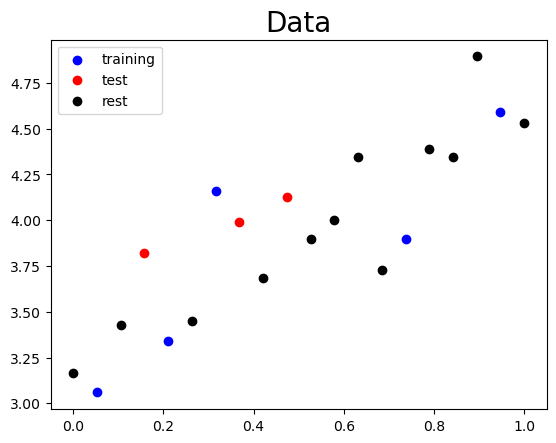

In [2]:
x = np.linspace(0,1,20)
y = 2*x+3+noise

x_train = np.array([x[i] for i in [1,4,6,14,18]])
y_train = np.array([y[i] for i in [1,4,6,14,18]])

x_test  = np.array([x[i] for i in [3,7,9]])
y_test  = np.array([y[i] for i in [3,7,9]])

x_rest  = np.array([x[i] for i in set(range(20))-(set([1,4,6,14,18]) | set([3,7,9]) )])
y_rest  = np.array([y[i] for i in set(range(20))-(set([1,4,6,14,18]) | set([3,7,9]) )])

plt.scatter(x_train,y_train, label='training', c='b')
plt.scatter(x_test,y_test, label='test', c='r')
plt.scatter(x_rest,y_rest, label='rest', c='k')
plt.title('Data', fontsize=20)
plt.legend();

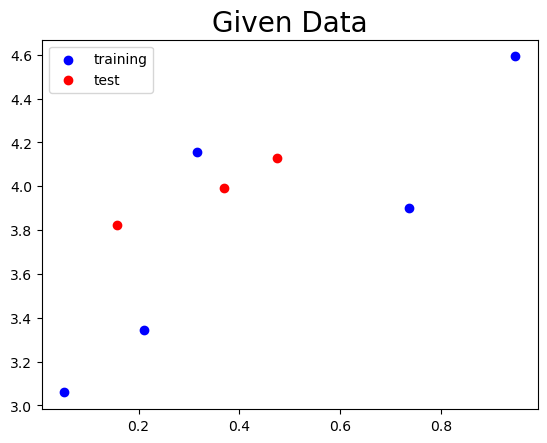

In [3]:
plt.scatter(x_train,y_train, label='training', c='b')
plt.scatter(x_test,y_test, label='test', c='r')
plt.title('Given Data', fontsize=20)
plt.legend();

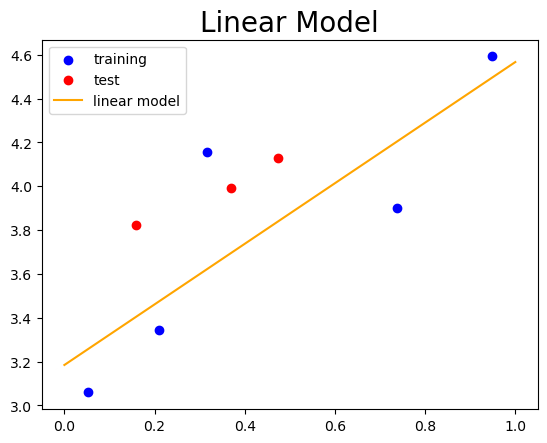

In [4]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train.reshape(-1,1),y_train)
y_l = lin_reg.predict(x.reshape(-1,1))

plt.scatter(x_train,y_train, label='training', c='b')
plt.scatter(x_test,y_test, label='test', c='r')
plt.plot(x,y_l,label= 'linear model', c='orange')
plt.title('Linear Model', fontsize=20)
plt.legend();

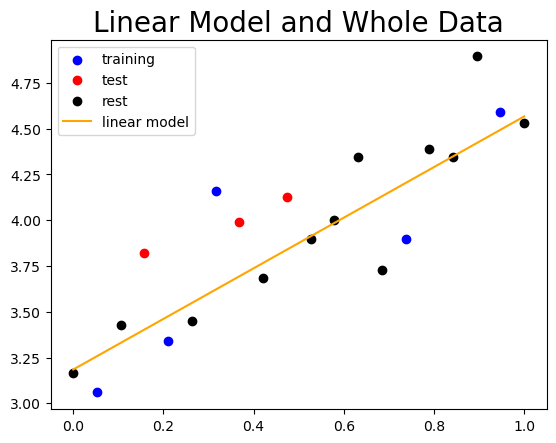

In [5]:
plt.scatter(x_train,y_train, label='training', c='b')
plt.scatter(x_test,y_test, label='test', c='r')
plt.scatter(x_rest,y_rest, label='rest', c='k')

plt.plot(x,y_l,label= 'linear model', c='orange')
plt.title('Linear Model and Whole Data', fontsize=20)
plt.legend();

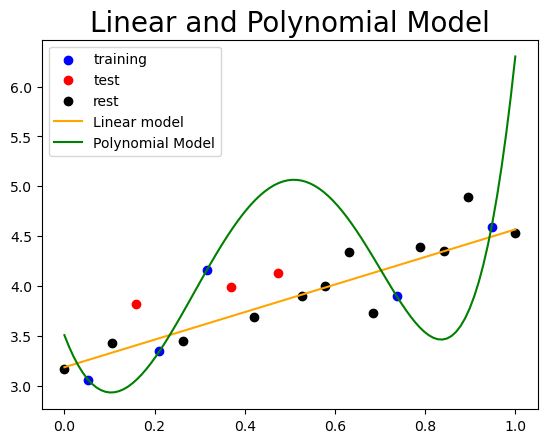

In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 5)
x_poly = poly.fit_transform(x_train.reshape(-1,1))

#poly.fit(x_poly, y_train)

lin_poly = LinearRegression()
lin_poly.fit(x_poly, y_train)

x_s = np.linspace(0,1,100)
y_p = lin_poly.predict(poly.fit_transform(x_s.reshape(-1,1)))

plt.scatter(x_train,y_train, label='training', c='b')
plt.scatter(x_test,y_test, label='test', c='r')
plt.scatter(x_rest,y_rest, label='rest', c='k')

plt.plot(x,y_l,label= 'Linear model', c='orange')
plt.plot(x_s,y_p, label='Polynomial Model', c='g')
plt.title('Linear and Polynomial Model', fontsize=20)
plt.legend();

In [79]:
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots

# fig = make_subplots()

# fig.add_trace(go.Scatter(x=x_train, y=y_train, mode='markers',  marker=dict(color='blue', size=20), name="training")  )
# fig.add_trace(go.Scatter(x=x_test, y=y_test, mode='markers',marker=dict(color='red'),  name="test")  )
# fig.add_trace(go.Scatter(x=x_rest, y=y_rest, mode='markers', marker=dict(color='black'),  name="rest")  )
# fig.add_trace(go.Scatter(x=x, y=y_l, marker=dict(color='orange'), name="Linear Model")  )
# fig.add_trace(go.Scatter(x=x_s, y=y_p, marker=dict(color='green'), name="Polynomial Model")  )


# fig.update_layout(title_text="Linear and Polynomial Model")


# Split data into Training and Test data
- Use train_test_split method
- Split arrays random train and test subsets
- Parameters
  random_state: controls shuffling applied to the data
  test_size: ration od test to whole data


Reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [8]:
# upload breast cancer data
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

In [9]:
# X, y and the shapes
X = dataset.data
y =  dataset.target
X.shape, y.shape

((569, 30), (569,))

In [10]:
# train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
# train shapes
X_train.shape, y_train.shape

((381, 30), (381,))

In [12]:
# test shapes
X_test.shape, y_test.shape

((188, 30), (188,))

# k-nearest neighbors (kNN)
- Simplest algorithm
- Most important parameter
    - n_neighbors: Number of neighbors to be used
- Task Types: classification and regression
- Classification: voting by considering closest n_neighbors points.
-  Regression: average of closest n_neighbors points.



Reference: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

## kNN Classifier

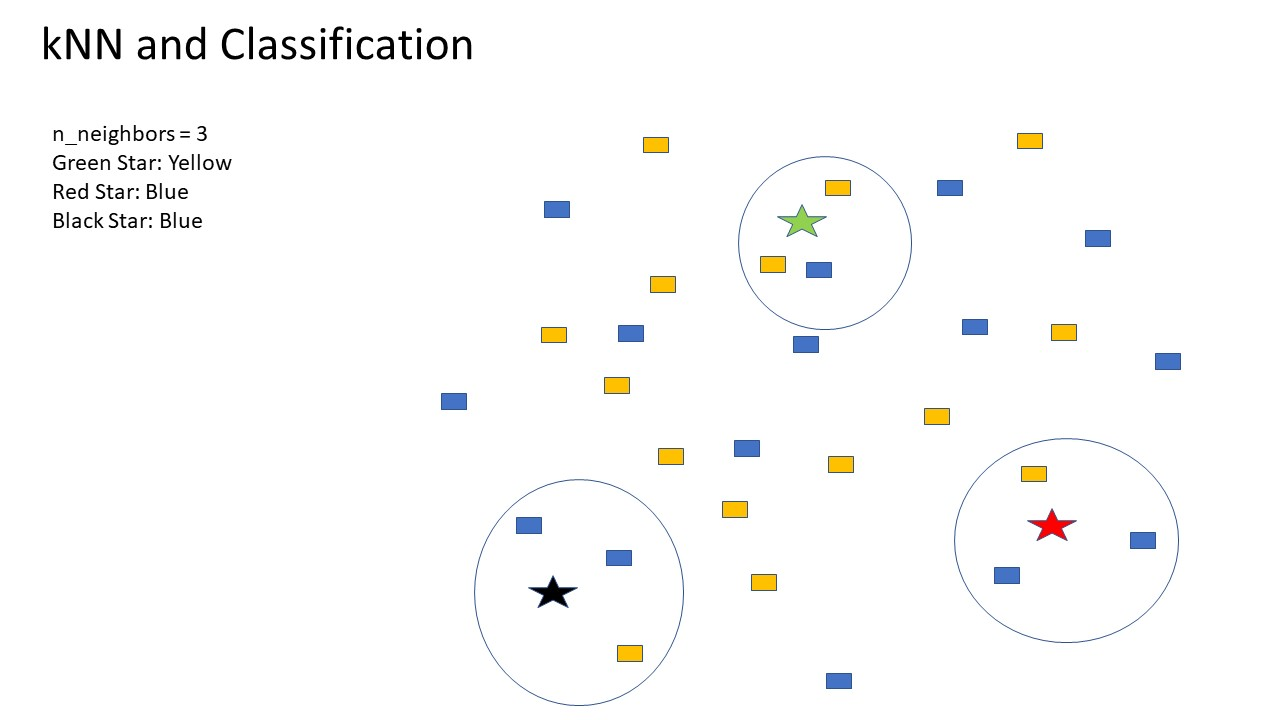

In [13]:
# import knn classifier
from sklearn.neighbors import KNeighborsClassifier

In [14]:
# help
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'}, callable or None, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighb

In [15]:
# instantiate the class into an object
knn = KNeighborsClassifier(n_neighbors=1)

In [16]:
# fit the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [17]:

# training score
knn.score(X_train,y_train)

1.0

In [18]:
# test score
knn.score(X_test,y_test)

0.9308510638297872

In [19]:
# predict X_test
y_predict = knn.predict(X_test)
y_predict

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1])

In [20]:
# actual y_test
y_test

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1])

In [21]:
#n_neighbors=3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [22]:
# training score
knn.score(X_train,y_train)

0.9448818897637795

In [23]:
# test score
knn.score(X_test,y_test)

0.9414893617021277

In [24]:
#n_neighbors=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [25]:
# training score
knn.score(X_train,y_train)

0.9212598425196851

In [26]:
# test score
knn.score(X_test,y_test)

0.9521276595744681

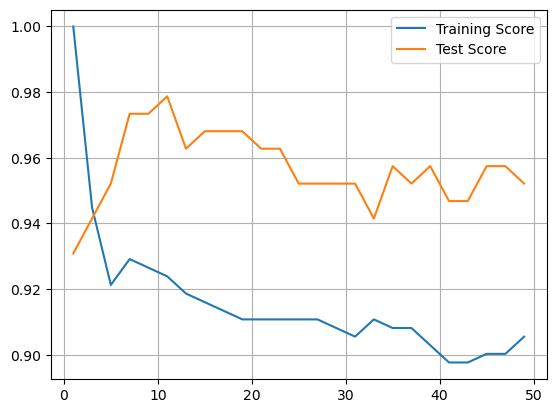

In [27]:
# training and test scores as n_neighbors changes
N = 50
train_score = []
test_score  = []
for i in range(1,N,2):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  train_score.append(knn.score(X_train,y_train))
  test_score.append(knn.score(X_test,y_test))
plt.plot(range(1,N,2),train_score, label='Training Score')
plt.plot(range(1,N,2),test_score, label='Test Score')
plt.grid()
plt.legend();

## kNN Regressor

In [54]:
# import boston housing data
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()

In [55]:
# X,y and shapes
X = dataset.data
y=  dataset.target
X.shape, y.shape

((20640, 8), (20640,))

In [56]:
# train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [57]:
# training shapes
X_train.shape, y_train.shape

((13828, 8), (13828,))

In [58]:
# test shapes
X_test.shape, y_test.shape

((6812, 8), (6812,))

In [59]:
# import kNN regressor
from sklearn.neighbors import KNeighborsRegressor

In [60]:
# instantiate the class into an object
knn = KNeighborsRegressor(n_neighbors=1)

In [61]:
# fit the model
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1)

In [62]:
# training score
knn.score(X_train,y_train)

1.0

In [63]:
# test score
knn.score(X_test,y_test)

-0.23171568176702073

In [64]:
# predicted values for X_test
y_predict = knn.predict(X_test)
y_predict

array([0.72 , 1.772, 3.417, ..., 1.098, 1.437, 2.556])

In [65]:
# actual y_test
y_test

array([0.477  , 0.458  , 5.00001, ..., 1.07   , 1.307  , 3.071  ])

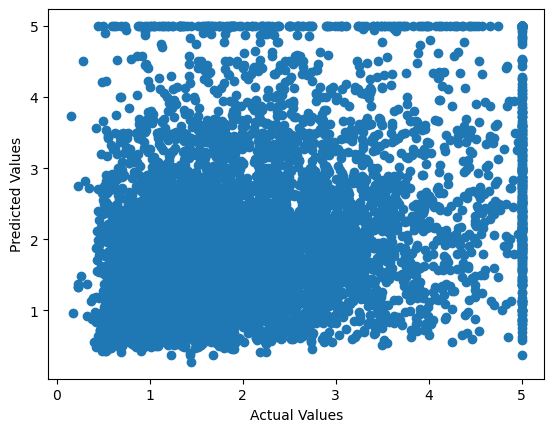

In [66]:
# plot actual and predicted values
plt.scatter(y_test, y_predict)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values');

In [67]:
# n_neighbors=3
knn = KNeighborsRegressor(n_neighbors=3)

In [68]:
# fit the model
knn.fit(X_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [69]:
# training score
knn.score(X_train,y_train)

0.5666340984826144

In [70]:
# test score
knn.score(X_test,y_test)

0.08043544739387165

In [71]:
# n_neighbors=5
knn = KNeighborsRegressor(n_neighbors=5)

In [72]:
# fit the model
knn.fit(X_train,y_train)

KNeighborsRegressor()

In [73]:
# training score
knn.score(X_train,y_train)

0.4343381821653689

In [74]:
# test score
knn.score(X_test,y_test)

0.129955281414476

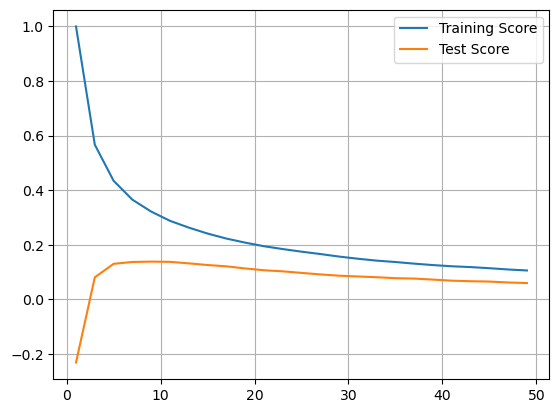

In [75]:
# training and test scores as n_neighbors changes

N = 50
train_score = []
test_score  = []
for i in range(1,N,2):
  knn = KNeighborsRegressor(n_neighbors=i)
  knn.fit(X_train, y_train)
  train_score.append(knn.score(X_train,y_train))
  test_score.append(knn.score(X_test,y_test))
plt.plot(range(1,N,2),train_score, label='Training Score')
plt.plot(range(1,N,2),test_score, label='Test Score')
plt.grid()
plt.legend();

In [76]:
# argsort
np.argsort(test_score)

array([ 0, 24, 23, 22, 21, 20, 19, 18, 17,  1, 16, 15, 14, 13, 12, 11, 10,
        9,  8,  7,  2,  6,  3,  5,  4])

In [77]:
# maximum test score
test_score[1]

0.08043544739387165